In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("C:\\Users\\talha\\Desktop\\NSE new\\Plastic Products.xlsx")

In [3]:
data.head()

,Company Name,Industry,Date,Price,Open,High,Low,Volume,Chg%
0,Supreme Industries Ltd,Plastic,"Nov 30, 2023",4431.15,4109.80,4593.9,4089.00,1.28M,0.0752
1,Supreme Industries Ltd,Plastic,"Nov 29, 2023",4121.30,4140.00,4237.0,4100.00,180.84K,-0.0005
2,Supreme Industries Ltd,Plastic,"Nov 28, 2023",4123.25,4149.95,4191.2,4074.05,235.64K,-0.0015
3,Supreme Industries Ltd,Plastic,"Nov 24, 2023",4129.25,4055.05,4165.2,4036.00,143.21K,0.0044
4,Supreme Industries Ltd,Plastic,"Nov 23, 2023",4111.05,4100.00,4130.0,4080.05,56.11K,0.0077


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9796 entries, 0 to 9795
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  9796 non-null   object 
 1   Industry      9796 non-null   object 
 2   Date          9796 non-null   object 
 3   Price         9796 non-null   float64
 4   Open          9796 non-null   float64
 5   High          9796 non-null   float64
 6   Low           9796 non-null   float64
 7   Volume        9796 non-null   object 
 8   Chg%          9796 non-null   float64
dtypes: float64(5), object(4)
memory usage: 688.9+ KB


### Data Cleaning

In [5]:
#Removing unwanted char from date columns
data['Date'] = data['Date'].str.replace(r'\s[A-Z]', '', regex=True)

In [6]:
#formating date columns
def extract_date_parts(date_str):
    # Check if the input is already a Timestamp object
    if isinstance(date_str, pd.Timestamp):
        return date_str.strftime('%Y-%m-%d')

    # Useing regular expressions to extract month, day, and year
    match = re.match(r'([a-zA-Z]+)\s+(\d+)\s+(\d+)', str(date_str))
    if match:
        month_name, day, year = match.groups()
        months_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
                       'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
        month = months_dict.get(month_name, month_name)
        return f"{year}-{month}-{day}"

    return str(date_str)

# Apply the function to clean and convert the 'Date' column
data['Date'] = data['Date'].apply(extract_date_parts)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [7]:
#Conversion of "Volume" column
def conv(s):
    if 'M' in str(s):
        return float(str(s).replace('M', '')) * 1000000
    elif 'K' in str(s):
        return float(str(s).replace('K', '')) * 1000

In [8]:
data["Volume"] = data["Volume"].apply(conv)

In [9]:
data.head()

,Company Name,Industry,Date,Price,Open,High,Low,Volume,Chg%
0,Supreme Industries Ltd,Plastic,2023-11-30,4431.15,4109.80,4593.9,4089.00,1280000.0,0.0752
1,Supreme Industries Ltd,Plastic,2023-11-29,4121.30,4140.00,4237.0,4100.00,180840.0,-0.0005
2,Supreme Industries Ltd,Plastic,2023-11-28,4123.25,4149.95,4191.2,4074.05,235640.0,-0.0015
3,Supreme Industries Ltd,Plastic,2023-11-24,4129.25,4055.05,4165.2,4036.00,143210.0,0.0044
4,Supreme Industries Ltd,Plastic,2023-11-23,4111.05,4100.00,4130.0,4080.05,56110.0,0.0077


In [10]:
data['Company Name'].unique()

array(['Supreme Industries Ltd', 'Nilkamal',
       'Jain Irrigation Systems Ltd', 'Finolex Industries Ltd. ',
       'Astral Ltd'], dtype=object)

In [11]:
#Removing dot from company Name
data['Company Name'] = data['Company Name'].apply(lambda x: x.replace('.', ''))

In [12]:
#all clean Data
data.head()

,Company Name,Industry,Date,Price,Open,High,Low,Volume,Chg%
0,Supreme Industries Ltd,Plastic,2023-11-30,4431.15,4109.80,4593.9,4089.00,1280000.0,0.0752
1,Supreme Industries Ltd,Plastic,2023-11-29,4121.30,4140.00,4237.0,4100.00,180840.0,-0.0005
2,Supreme Industries Ltd,Plastic,2023-11-28,4123.25,4149.95,4191.2,4074.05,235640.0,-0.0015
3,Supreme Industries Ltd,Plastic,2023-11-24,4129.25,4055.05,4165.2,4036.00,143210.0,0.0044
4,Supreme Industries Ltd,Plastic,2023-11-23,4111.05,4100.00,4130.0,4080.05,56110.0,0.0077


In [13]:
#Creating groups to perform operations group wise
data_groups = data.groupby(by=["Company Name"])

data_SupremeIndustriesLtd = data_groups.get_group("Supreme Industries Ltd") 
data_AstralLtd = data_groups.get_group("Astral Ltd") 
data_FinolexIndustriesLtd = data_groups.get_group("Finolex Industries Ltd ") 
data_JainIrrigationSystemsLtd = data_groups.get_group("Jain Irrigation Systems Ltd") 
data_Nilkamal = data_groups.get_group("Nilkamal") 

In [14]:
#Function to calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Price'].diff(1)
    
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    
    avg_gains = gains.rolling(window=period, min_periods=14).mean()
    avg_losses = losses.rolling(window=period, min_periods=14).mean()
    
    rs = avg_gains / avg_losses
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [15]:
for company_data in [data_SupremeIndustriesLtd, data_AstralLtd, data_FinolexIndustriesLtd, 
                           data_JainIrrigationSystemsLtd, data_Nilkamal]: company_data['RSI'] = calculate_rsi(company_data)

In [16]:
data_SupremeIndustriesLtd.head()

,Company Name,Industry,Date,Price,Open,High,Low,Volume,Chg%,RSI
0,Supreme Industries Ltd,Plastic,2023-11-30,4431.15,4109.80,4593.9,4089.00,1280000.0,0.0752,NaN
1,Supreme Industries Ltd,Plastic,2023-11-29,4121.30,4140.00,4237.0,4100.00,180840.0,-0.0005,NaN
2,Supreme Industries Ltd,Plastic,2023-11-28,4123.25,4149.95,4191.2,4074.05,235640.0,-0.0015,NaN
3,Supreme Industries Ltd,Plastic,2023-11-24,4129.25,4055.05,4165.2,4036.00,143210.0,0.0044,NaN
4,Supreme Industries Ltd,Plastic,2023-11-23,4111.05,4100.00,4130.0,4080.05,56110.0,0.0077,NaN


In [17]:
#Function to calculate SMA
def calculate_sma(data, column_name='Price', window=50):
    data['SMA50'] = data[column_name].rolling(window=window, min_periods=50).mean()
    
    # Find the index of the last NaN value in 'SMA50'
    last_nan_index = data['SMA50'].last_valid_index()
    
    # Replace NaN values in 'SMA50' column with the average from the last NaN value
    if last_nan_index is not None:
        data['SMA50'] = data['SMA50'].fillna(data['SMA50'].loc[last_nan_index:].expanding().mean())
    
    return data

In [18]:
for company_data in [data_SupremeIndustriesLtd, data_AstralLtd, data_FinolexIndustriesLtd,
                         data_JainIrrigationSystemsLtd, data_Nilkamal]: company_data = calculate_sma(company_data)

## Outliers

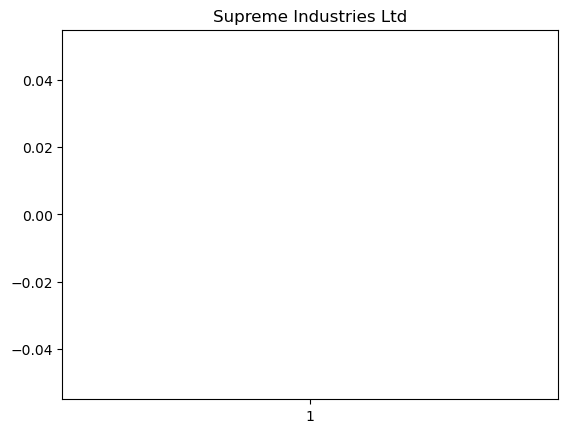

In [19]:
plt.boxplot(data_SupremeIndustriesLtd['Volume'])
plt.title('Supreme Industries Ltd')
plt.show()

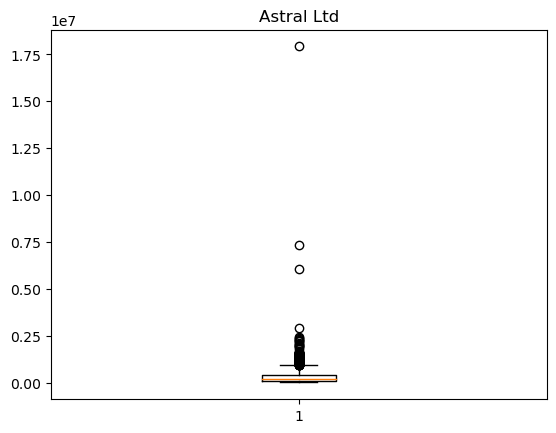

In [20]:
plt.boxplot(data_AstralLtd['Volume'])
plt.title('Astral Ltd')
plt.show()

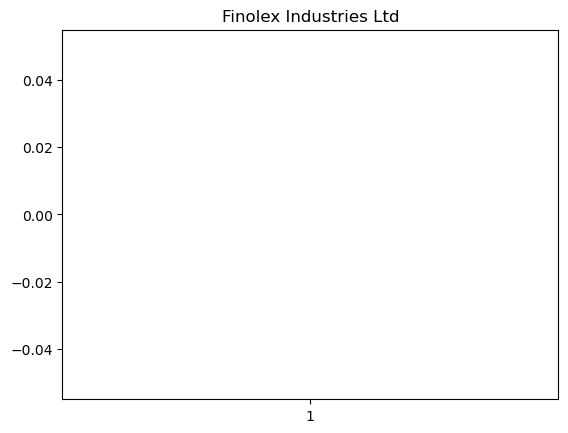

In [21]:
plt.boxplot(data_FinolexIndustriesLtd ['Volume'])
plt.title('Finolex Industries Ltd')
plt.show()

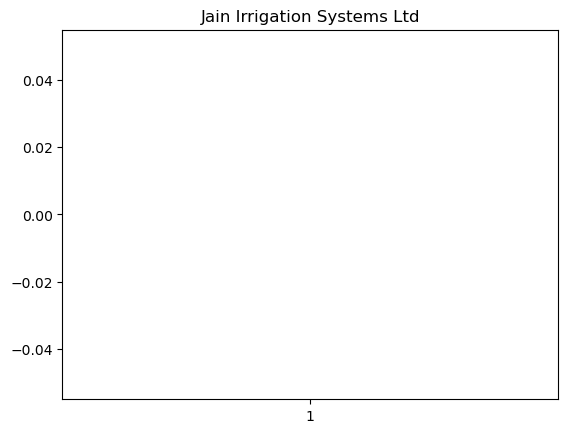

In [22]:
plt.boxplot(data_JainIrrigationSystemsLtd['Volume'])
plt.title('Jain Irrigation Systems Ltd')
plt.show()

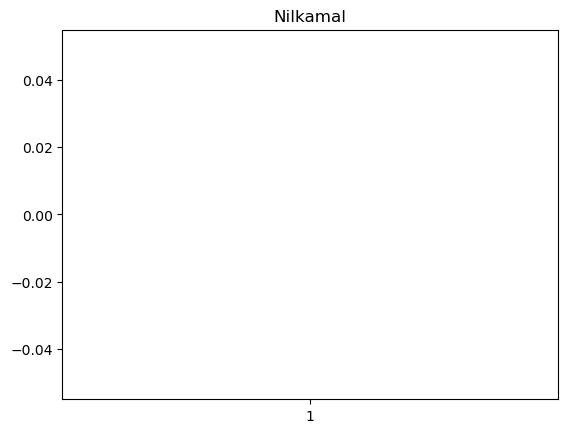

In [23]:
plt.boxplot(data_Nilkamal['Volume'])
plt.title('Nilkamal')
plt.show()

In [24]:
#after removing outliers merging all Company data
data2 = pd.concat([data_SupremeIndustriesLtd, data_AstralLtd, 
                  data_FinolexIndustriesLtd, data_JainIrrigationSystemsLtd, data_Nilkamal])

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9796 entries, 0 to 3917
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company Name  9796 non-null   object        
 1   Industry      9796 non-null   object        
 2   Date          9786 non-null   datetime64[ns]
 3   Price         9796 non-null   float64       
 4   Open          9796 non-null   float64       
 5   High          9796 non-null   float64       
 6   Low           9796 non-null   float64       
 7   Volume        9792 non-null   float64       
 8   Chg%          9796 non-null   float64       
 9   RSI           9731 non-null   float64       
 10  SMA50         9551 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 918.4+ KB


In [27]:
#data2 = data2.dropna(axis=0)

In [29]:
data2.head(2)

,Company Name,Industry,Date,Price,Open,High,Low,Volume,Chg%,RSI,SMA50
0,Supreme Industries Ltd,Plastic,2023-11-30,4431.15,4109.8,4593.9,4089.0,1280000.0,0.0752,NaN,NaN
1,Supreme Industries Ltd,Plastic,2023-11-29,4121.30,4140.0,4237.0,4100.0,180840.0,-0.0005,NaN,NaN


In [31]:
#data2.to_excel('Plastic-Sector-II.xlsx', index=False)